In [1]:
import re
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 
import nltk
nltk.download('stopwords')
import spacy
import string
pd.options.mode.chained_assignment = None

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:
df = pd.read_csv("/content/drive/MyDrive/soft computing /assignment 3/Dataset 1.csv",engine='python')
df


,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [5]:
df.columns = ["text", "lebel"]
df["text"] = df["text"].str.lower()
df.head()

,text,lebel
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat need to send 'em to my accountant tomo...,0
4,add me on myspace!!! myspace.com/lookthunder,0


In [6]:
def remove_users(tweet):
    """Takes a string and removes retweet and @user information"""
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove re-tweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove tweeted at
    return tweet
df['text'] = np.vectorize(remove_users)(df['text']) 

def remove_links(tweet):
    """Takes a string and removes web links from it"""
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet)
    return tweet
df["text"] = df["text"].apply(lambda text: remove_links(text))

def remove_hashtags(tweet):
    """Takes a string and removes any hash tags"""
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove hash tags
    return tweet
df["text"] = df["text"].apply(lambda text: remove_hashtags(text))

df.head()

,text,lebel
0,just had a real good moment. i missssssssss hi...,0
1,s reading manga,0
2,-,0
3,need to send 'em to my accountant tomorrow. o...,0
4,add me on myspace!!! myspace.com/lookthunder,0


In [7]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,text,lebel
0,just had a real good moment i missssssssss him...,0
1,s reading manga,0
2,,0
3,need to send em to my accountant tomorrow odd...,0
4,add me on myspace myspacecomlookthunder,0


In [8]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [9]:

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text"] = df["text"].apply(lambda text: remove_stopwords(text))
df.head()

,text,lebel
0,real good moment missssssssss much,0
1,reading manga,0
2,,0
3,need send em accountant tomorrow oddly wasnt e...,0
4,add myspace myspacecomlookthunder,0


In [10]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
df["text"] = df["text"].apply(lambda text: remove_urls(text))
df.head()

,text,lebel
0,real good moment missssssssss much,0
1,reading manga,0
2,,0
3,need send em accountant tomorrow oddly wasnt e...,0
4,add myspace myspacecomlookthunder,0


In [11]:
 import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text"] = df["text"].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,text,lebel
0,real good moment miss much,0
1,reading manga,0
2,,0
3,need send em accountant tomorrow oddly wasnt e...,0
4,add myspace myspacecomlookthunder,0


In [12]:
df["text"] = df["text"].apply(lambda text: [w for w in str(text).split() if w.isalpha()] )

df.head()

,text,lebel
0,"[real, good, moment, miss, much]",0
1,"[reading, manga]",0
2,[],0
3,"[need, send, em, accountant, tomorrow, oddly, ...",0
4,"[add, myspace, myspacecomlookthunder]",0


In [13]:
df.to_csv(r"preprocessed_dataset.csv",header=None, index=False)
df

,text,lebel
0,"[real, good, moment, miss, much]",0
1,"[reading, manga]",0
2,[],0
3,"[need, send, em, accountant, tomorrow, oddly, ...",0
4,"[add, myspace, myspacecomlookthunder]",0
...,...,...
10309,"[depression, g, herbo, mood, im, done, stressi...",1
10310,"[depression, succumbs, brain, make, feel, like...",1
10311,"[etamine, nasal, spray, show, promise, depress...",1
10312,"[dont, mistake, bad, day, depression, everyone...",1


In [14]:
df = pd.read_csv("/content/drive/MyDrive/soft computing /assignment 3/preprocessed_dataset.csv", header=None,engine="python")
df.columns = ["text", "lebel"]
df.isnull().sum()
df1=df
df1.dropna(inplace = True)
df1.isnull().sum()
df1.to_csv(r"final_dataset",header=None, index=False)

In [15]:
df = pd.read_csv("/content/final_dataset", header=None,engine='python')


In [16]:
df

,0,1
0,"['real', 'good', 'moment', 'miss', 'much']",0
1,"['reading', 'manga']",0
2,[],0
3,"['need', 'send', 'em', 'accountant', 'tomorrow...",0
4,"['add', 'myspace', 'myspacecomlookthunder']",0
...,...,...
10309,"['depression', 'g', 'herbo', 'mood', 'im', 'do...",1
10310,"['depression', 'succumbs', 'brain', 'make', 'f...",1
10311,"['etamine', 'nasal', 'spray', 'show', 'promise...",1
10312,"['dont', 'mistake', 'bad', 'day', 'depression'...",1


In [17]:
class Sequences(Dataset):
    def __init__(self, data):
        self.vectorizer = CountVectorizer(stop_words='english')
        self.sequences = self.vectorizer.fit_transform(data.text.tolist())
        self.lebels = data.lebel.tolist()
        self.token2idx = self.vectorizer.vocabulary_
        self.idx2token = {idx: token for token, idx in self.token2idx.items()}
    
    def __getitem__(self, i):
        return self.sequences[i, :].toarray(), self.lebels[i]
    
    def __len__(self):
        return self.sequences.shape[0]

In [18]:

df = pd.read_csv("/content/final_dataset", header=None,engine="python")

df.columns = ["text", "lebel"]
train_size=int(len(df)*0.7)
df_train = df.head(train_size)
df_test = df.tail(int(len(df)*0.3))

dataset = Sequences(df_train)
train_loader = DataLoader(dataset, batch_size=900)






In [19]:
sequence_length = 28
hidden_size = 128
num_layers = 3
num_classes = 1
batch_sizeRNN = 80
num_epochs = 4
learning_rate = 0.001

In [20]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True)
        self.fc = nn.Linear(hidden_size*2, num_classes)
    
    def forward(self, x):
        # Set initial hidden and cell states 
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device)    
        # Forward propagate LSTM
        out, _ = self.rnn(x, h0)  # out: tensor of shape (batch_size, seq_length, hidden_size)
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

In [21]:
model = RNN(len(dataset.token2idx), hidden_size, num_layers,num_classes).to(device)

In [22]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [23]:

train_losses = []
iter = 0
total_step = train_size
for epoch in range(15):
    losses = []
    total = 0
    for inputs, target in train_loader:
        
        inputs=inputs.float()
        inputs=inputs.to(device)
       
        targets=target.float()
        target=targets.to(device)

        model.zero_grad()

        output = model(inputs)
        loss = criterion(output.squeeze(), target)
        
        loss.backward()
          
        optimizer.step()
        
        losses.append(loss.item())
        total += 1
        
    epoch_loss = sum(losses) / total
    train_losses.append(epoch_loss)
        
    print(f'Epoch #{epoch + 1}\tTrain Loss: {epoch_loss:.10f}')

    

Epoch #1	Train Loss: 0.2621454946
Epoch #2	Train Loss: 0.0030518507
Epoch #3	Train Loss: 0.0001536995
Epoch #4	Train Loss: 0.0000641338
Epoch #5	Train Loss: 0.0000469077
Epoch #6	Train Loss: 0.0000412155
Epoch #7	Train Loss: 0.0000388564
Epoch #8	Train Loss: 0.0000376882
Epoch #9	Train Loss: 0.0000369825
Epoch #10	Train Loss: 0.0000364526
Epoch #11	Train Loss: 0.0000359893
Epoch #12	Train Loss: 0.0000355474
Epoch #13	Train Loss: 0.0000351077
Epoch #14	Train Loss: 0.0000346676
Epoch #15	Train Loss: 0.0000342208


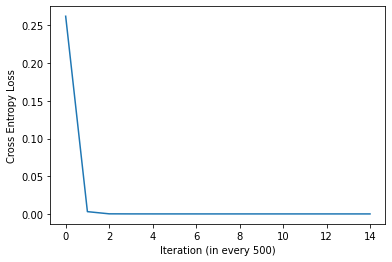

In [25]:
import matplotlib.pyplot as plt
plt.plot(train_losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [26]:
def predict_sentiment(text):
  test_vector= torch.LongTensor(dataset.vectorizer.transform([text]).toarray()).to(device)

  test_vector=test_vector.unsqueeze(1)
  output = model(torch.tensor(test_vector , dtype=torch.float))
  prediction = torch.sigmoid(output).item()
  
  if prediction < 0.5:
    print(f'{prediction:0.3}: Positive sentiment')
    return 1
  else:
    print(f'{prediction:0.3}: Negative sentiment')
    return 0

In [35]:
test_text = "I am very much  happy."
predict_sentiment(test_text)

5.16e-05: Positive sentiment


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


1

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

pred_lebels = []

sentences = list(df_test['text'])
lebels = df_test['lebel']

print(sentences)

for sentence in sentences:
  pred_lebels.append(predict_sentiment(sentence))

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(lebels, pred_lebels)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(lebels, pred_lebels)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(lebels, pred_lebels)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(lebels, pred_lebels)
print('F1 score: %f' % f1)

# confusion matrix
matrix = confusion_matrix(lebels, pred_lebels)
print(matrix)

["['class', 'bad', 'depressionclasses', 'bad', 'depressio']", "['got', 'depression', 'lo']", "['make', 'feel', 'bad', 'depression', 'like']", "['depression', 'oh', 'sorry', 'thats', 'one', 'five', 'stage', 'something', 'else', 'relevant']", "['joking', 'think', 'bipolar', 'disorder', 'cause', 'manic', 'episode', 'followed', 'period', 'crippling', 'depression', 'behavior', 'go', 'back', 'year']", "['psa', 'call', 'someone', 'struggling', 'depression', 'anxiety', 'etc', 'crazy', 'piece', 'crap']", "['isnt', 'elderly', 'people', 'need', 'hen', 'power', 'benefit', 'low', 'point', 'able', 'work', 'struggling', 'depression', 'chronic', 'fatigue', 'hen']", "['dwayne', 'johnson', 'praised', 'opening', 'battle', 'wdepression', 'cry', 'constantly']", "['dan', 'speech', 'depression', 'anxiety', 'going', 'therapist', 'stigmatised', 'society', 'love', 'much']", "['feel', 'like', 'postpartum', 'depression']", "['ce', 'delay', 'depression', 'guideline', 'labelled', 'fit', 'purpose', 'gp', 'expert', '

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


0.00511: Positive sentiment
0.0633: Positive sentiment
0.00457: Positive sentiment
0.999: Negative sentiment
0.999: Negative sentiment
0.000272: Positive sentiment
0.279: Positive sentiment
0.0945: Positive sentiment
0.906: Negative sentiment
0.981: Negative sentiment
0.000334: Positive sentiment
0.00115: Positive sentiment
0.276: Positive sentiment
0.995: Negative sentiment
0.699: Negative sentiment
0.0215: Positive sentiment
0.962: Negative sentiment
0.994: Negative sentiment
0.974: Negative sentiment
0.135: Positive sentiment
0.928: Negative sentiment
0.59: Negative sentiment
0.994: Negative sentiment
0.0182: Positive sentiment
0.152: Positive sentiment
0.958: Negative sentiment
0.000321: Positive sentiment
0.0102: Positive sentiment
0.221: Positive sentiment
0.934: Negative sentiment
0.999: Negative sentiment
0.953: Negative sentiment
0.401: Positive sentiment
0.0636: Positive sentiment
0.924: Negative sentiment
0.977: Negative sentiment
0.00594: Positive sentiment
0.0467: Positive

In [34]:
accuracy = 100 * accuracy_score(lebels, pred_lebels)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = 100 * precision_score(lebels, pred_lebels)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = 100 * recall_score(lebels, pred_lebels)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = 100 * f1_score(lebels, pred_lebels)
print('F1 score: %f' % f1)


Accuracy: 74.789916
Precision: 74.789916
Recall: 100.000000
F1 score: 85.576923


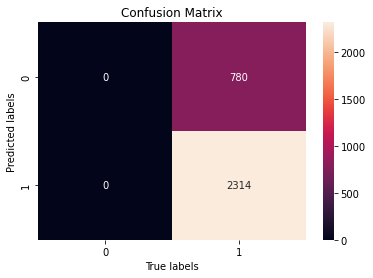

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()

cm = confusion_matrix(lebels, pred_lebels)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('True labels');ax.set_ylabel('Predicted labels'); 
ax.set_title('Confusion Matrix'); 